In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import neural_network as nn
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import GridSearchCV, validation_curve
from sklearn.metrics import f1_score, classification_report, roc_curve,roc_auc_score, accuracy_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing as pp
from collections import Counter
from sklearn.metrics import confusion_matrix as cm
from sklearn.preprocessing import StandardScaler

In [64]:
data=pd.read_csv('cardiovasculaire.csv')
data

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,heart_desease
0,163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
1,164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
2,165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
3,166,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0
4,167,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,865,52,1,2,172,199,1,0,162,0,0.5,1,0,7,0
605,866,44,1,1,120,263,0,0,173,0,0.0,1,0,7,0
606,867,56,0,1,140,294,0,2,153,0,1.3,2,0,3,0
607,868,57,1,3,140,192,0,0,148,0,0.4,2,0,6,0


In [65]:
print(data.info())
data.isnull().sum().sort_values()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609 entries, 0 to 608
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     609 non-null    int64  
 1   age            609 non-null    int64  
 2   sex            609 non-null    int64  
 3   cp             609 non-null    int64  
 4   trestbps       609 non-null    int64  
 5   chol           609 non-null    int64  
 6   fbs            609 non-null    int64  
 7   restecg        609 non-null    int64  
 8   thalach        609 non-null    int64  
 9   exang          609 non-null    int64  
 10  oldpeak        609 non-null    float64
 11  slop           609 non-null    int64  
 12  ca             609 non-null    int64  
 13  thal           609 non-null    int64  
 14  heart_desease  609 non-null    int64  
dtypes: float64(1), int64(14)
memory usage: 71.5 KB
None


Unnamed: 0       0
age              0
sex              0
cp               0
trestbps         0
chol             0
fbs              0
restecg          0
thalach          0
exang            0
oldpeak          0
slop             0
ca               0
thal             0
heart_desease    0
dtype: int64

In [66]:
doublons =len(data[data.duplicated()])
print(doublons)

0


In [67]:
data=data.drop(['Unnamed: 0'], axis=1)

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


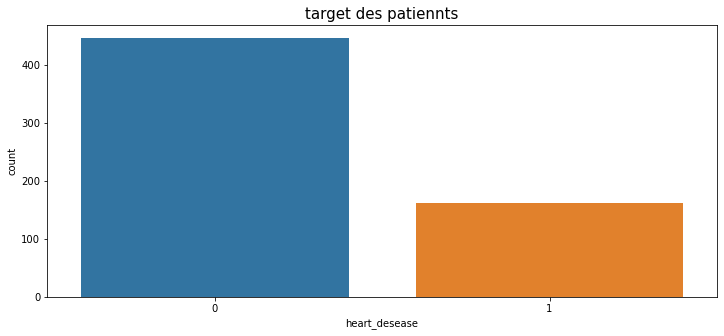

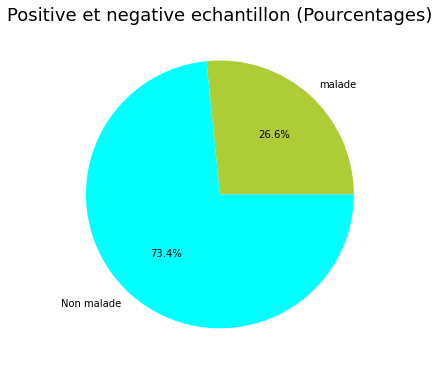

In [68]:
plt.figure(figsize=(12,5))
sns.countplot(data['heart_desease'])
plt.title('target des patiennts', fontsize = 15)
plt.show()
positive_pourc = len(data[data['heart_desease'] == 1])/len(data)*100 
negative_pourc = len(data[data['heart_desease'] == 0])/len(data)*100
pourc = [positive_pourc,negative_pourc]
plt.figure(figsize = (6,8))
plt.pie(pourc, labels=['malade','Non malade'], autopct = '%.1f%%', colors = ['#aecc35', 'cyan'])
plt.title('Positive et negative echantillon (Pourcentages)', fontsize = 18)
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


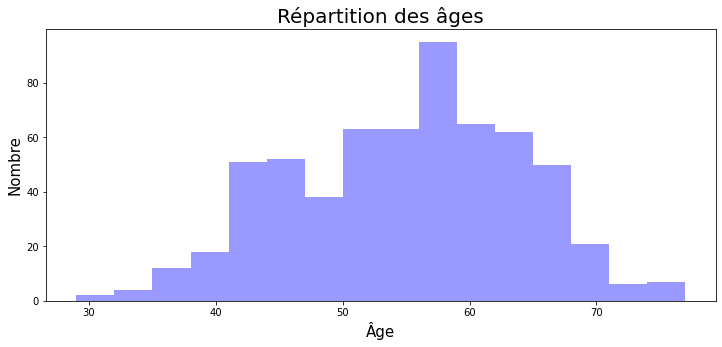

In [69]:
#exploration âge du patient

# Créer le graphique
plt.figure(figsize=(12, 5))
sns.distplot(data['age'], kde=False, color='blue')
plt.xlabel('Âge', fontsize=15)
plt.ylabel('Nombre', fontsize=15)
plt.title('Répartition des âges', fontsize=20)
plt.show()

In [70]:
# Maladie cardiaque et l'age
categorie=['Enfant', 'Jeune', 'Moyen', 'Vieux']
age_limites=[0,18,35,60, data['age'].max()]
data['age_category']=pd.cut(data['age'], bins=age_limites, labels=categorie)


'''subset=data.groupby(['age_category','heart_desease']).size().unstack()
subset.plot(kind='bar', stacked=True)
plt.xlabel('Tranche D age')
plt.ylabel('frequence')
plt.legend(['Cible O', 'Cible 1'])
plt.show()'''
'''plt.figure(figsize=(10, 6))
plt.hist([data[data['heart_desease']==0]['age_category'], data[data['heart_desease']==1]['age_category']], bins=len(categorie),
        rwidth=0.8,
        edgecolor='black',
        label=['heart_desease'])
plt.xlabel('Tranche d\'âge')
plt.ylabel('nombre de personnes')
plt.xticks(rotation=45)
plt.legend()
plt.show()
'''

"plt.figure(figsize=(10, 6))\nplt.hist([data[data['heart_desease']==0]['age_category'], data[data['heart_desease']==1]['age_category']], bins=len(categorie),\n        rwidth=0.8,\n        edgecolor='black',\n        label=['heart_desease'])\nplt.xlabel('Tranche d'âge')\nplt.ylabel('nombre de personnes')\nplt.xticks(rotation=45)\nplt.legend()\nplt.show()\n"

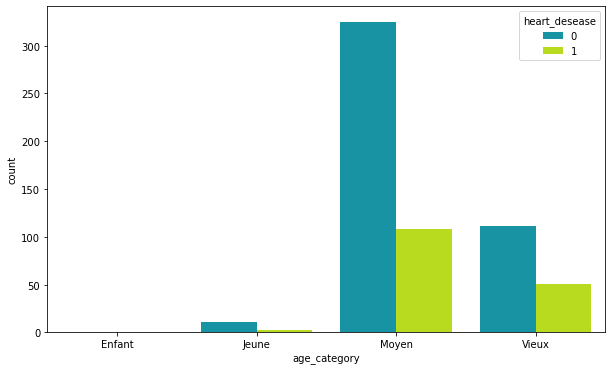

'plt.figure(figsize=(14,6))\nplt.subplot(1,2,1)\nsns.set(style="darkgrid")\ntotal = float(len(data))\nax1 = sns.countplot(x=\'age_category\',palette="rocket_r", data=data)\nplt.title(\'Count of age_category\',fontsize=20)\nfor p in ax1.patches:\n    percentage = \'{:.1f}%\'.format(100 * p.get_height()/total)\n    x = p.get_x() + p.get_width()\n    y = p.get_height()\n    ax1.annotate(percentage, (x, y),ha=\'center\')\nplt.subplot(1,2,2)\ntotal = float(len(data))\nax2 = sns.countplot(x=\'age_category\',hue=\'heart_desease\',palette="rocket_r", data=data)\nplt.title(\'heart_desease of age_category\',fontsize=20)\nfor p in ax2.patches:\n    percentage = \'{:.1f}%\'.format(100 * p.get_height()/total)\n    x = p.get_x() + p.get_width()\n    y = p.get_height()\n    ax2.annotate(percentage, (x, y),ha=\'center\')\nplt.show()plt.xlabel(\'Tranche D age\', fontsize = 14)\nplt.ylabel(\'nombre\', fontsize = 14)'

In [71]:
plt.figure(figsize = (10,6) )
sns.countplot(data = data, x = 'age_category', hue = 'heart_desease', palette = 'nipy_spectral')
plt.show()

'''plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.set(style="darkgrid")
total = float(len(data))
ax1 = sns.countplot(x='age_category',palette="rocket_r", data=data)
plt.title('Count of age_category',fontsize=20)
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax1.annotate(percentage, (x, y),ha='center')
plt.subplot(1,2,2)
total = float(len(data))
ax2 = sns.countplot(x='age_category',hue='heart_desease',palette="rocket_r", data=data)
plt.title('heart_desease of age_category',fontsize=20)
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax2.annotate(percentage, (x, y),ha='center')
plt.show()plt.xlabel('Tranche D age', fontsize = 14)
plt.ylabel('nombre', fontsize = 14)'''

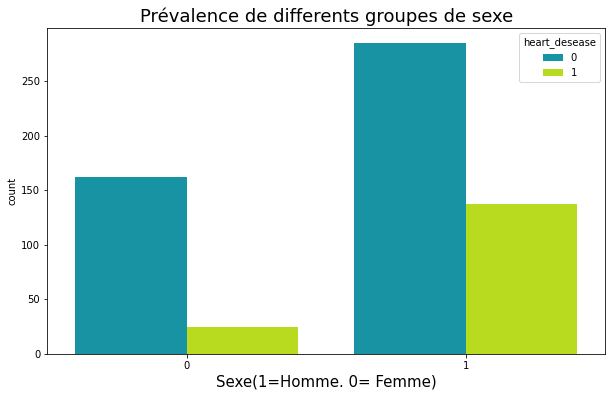

In [72]:
#Nombre d’hommes ou de femmes qui sont réellement intéressés à l’assurance automobile
plt.figure(figsize = (10,6) )
sns.countplot(data = data, x = 'sex', hue = 'heart_desease', palette = 'nipy_spectral')
plt.xlabel('Sexe(1=Homme. 0= Femme)', fontsize=15)
plt.title('Prévalence de differents groupes de sexe', fontsize = 18)
plt.show()


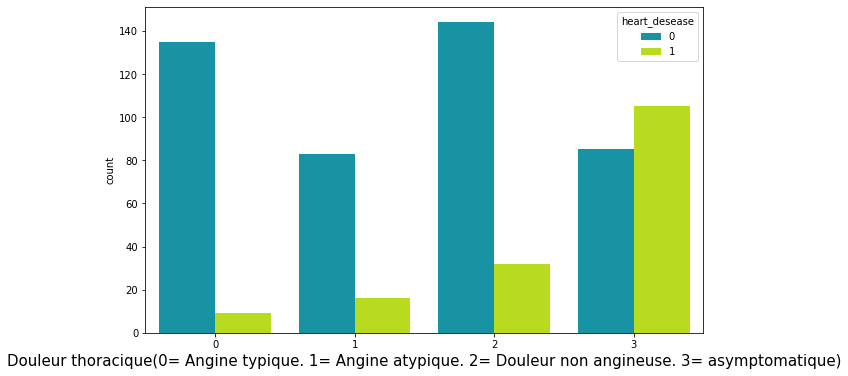

In [73]:
plt.figure(figsize = (10,6) )
sns.countplot(data = data, x = 'cp', hue = 'heart_desease', palette = 'nipy_spectral')
plt.xlabel('Douleur thoracique(0= Angine typique. 1= Angine atypique. 2= Douleur non angineuse. 3= asymptomatique)', fontsize=15)
plt.show()

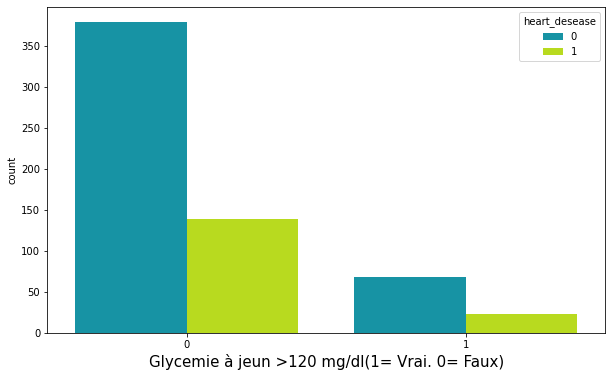

In [74]:
plt.figure(figsize = (10,6) )
sns.countplot(data = data, x = 'fbs', hue = 'heart_desease', palette = 'nipy_spectral')
plt.xlabel('Glycemie à jeun >120 mg/dl(1= Vrai. 0= Faux)', fontsize=15)
plt.show()

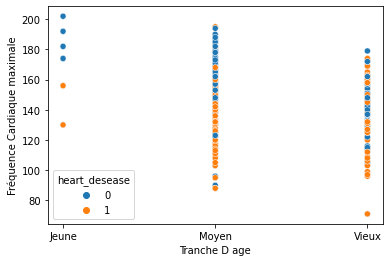

In [75]:
sns.scatterplot(data=data, x="age_category", y="thalach", hue="heart_desease")
plt.xlabel("Tranche D age")
plt.ylabel("Fréquence Cardiaque maximale")
plt.show()

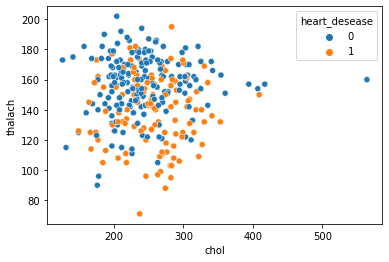

In [76]:
sns.scatterplot(x='chol', y='thalach',hue='heart_desease', data=data)
plt.show()

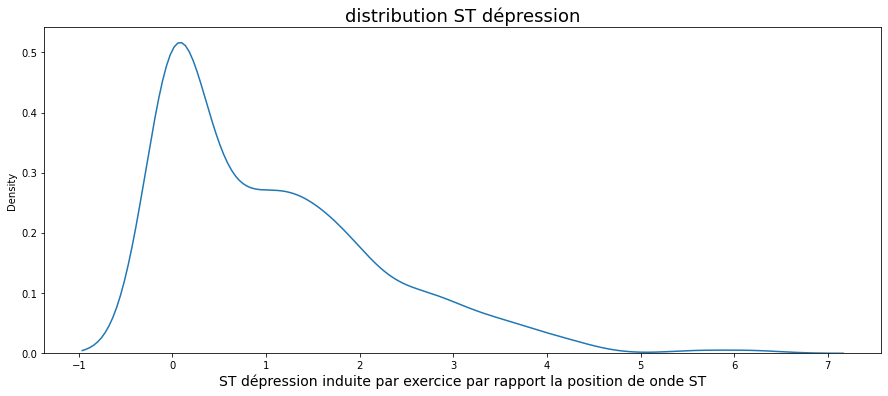

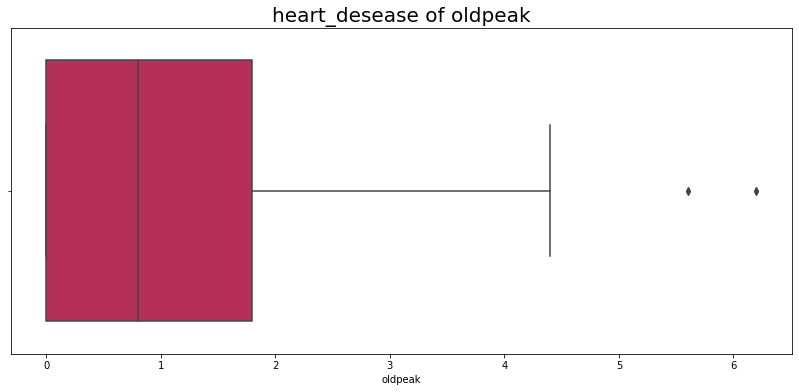

In [77]:
plt.figure(figsize=(15,6))
sns.kdeplot(data['oldpeak'])
plt.xlabel('ST dépression induite par exercice par rapport la position de onde ST', fontsize = 14)
plt.title('distribution ST dépression', fontsize = 18)
plt.show()
plt.figure(figsize=(14,6))
sns.boxplot(x='oldpeak',palette="rocket_r", data=data)
plt.title('heart_desease of oldpeak',fontsize=20)
plt.show()

La courbe Boxplot

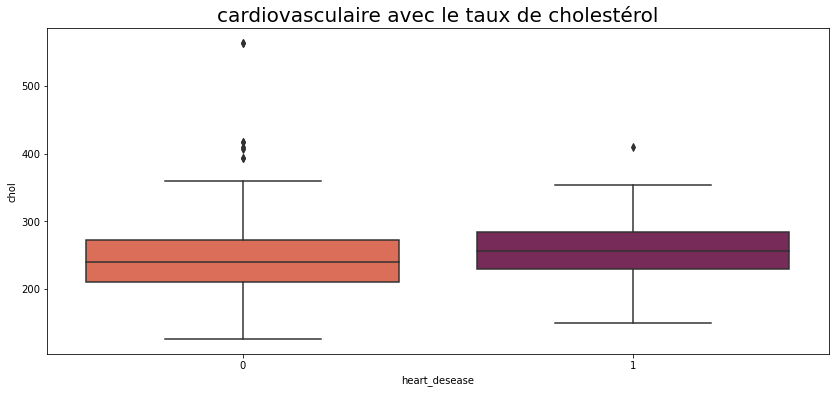

In [78]:
plt.figure(figsize=(14,6))
sns.boxplot(x='heart_desease',y='chol',palette="rocket_r", data=data)
plt.title('cardiovasculaire avec le taux de cholestérol',fontsize=20)
plt.show()


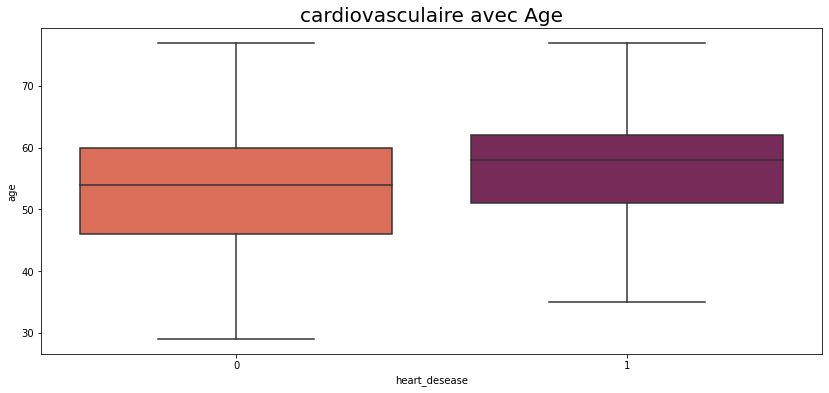

In [79]:
plt.figure(figsize=(14,6))
sns.boxplot(x='heart_desease',y='age',palette="rocket_r", data=data)
plt.title('cardiovasculaire avec Age',fontsize=20)
plt.show()


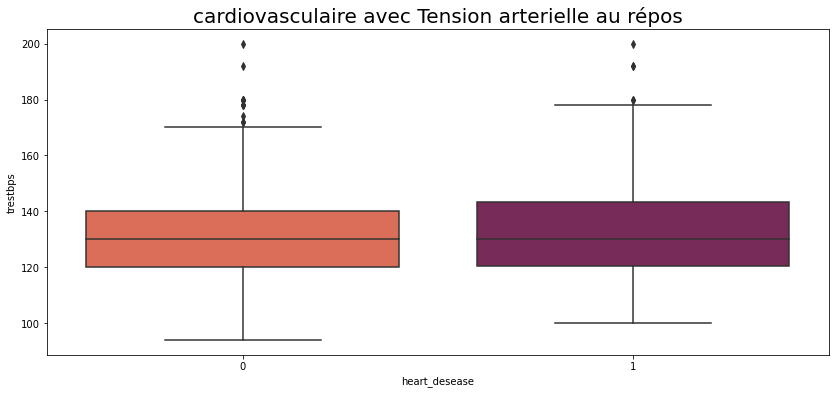

In [80]:
plt.figure(figsize=(14,6))
sns.boxplot(x='heart_desease',y='trestbps',palette="rocket_r", data=data)
plt.title('cardiovasculaire avec Tension arterielle au répos',fontsize=20)
plt.show()

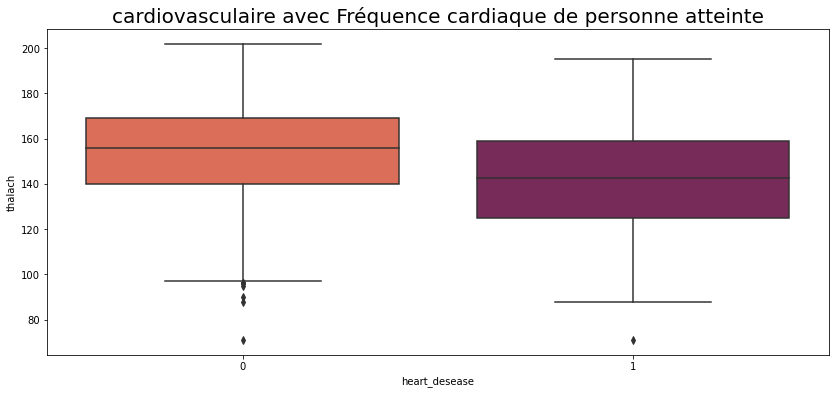

In [81]:
plt.figure(figsize=(14,6))
sns.boxplot(x='heart_desease',y='thalach',palette="rocket_r", data=data)
plt.title('cardiovasculaire avec Fréquence cardiaque de personne atteinte',fontsize=20)
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


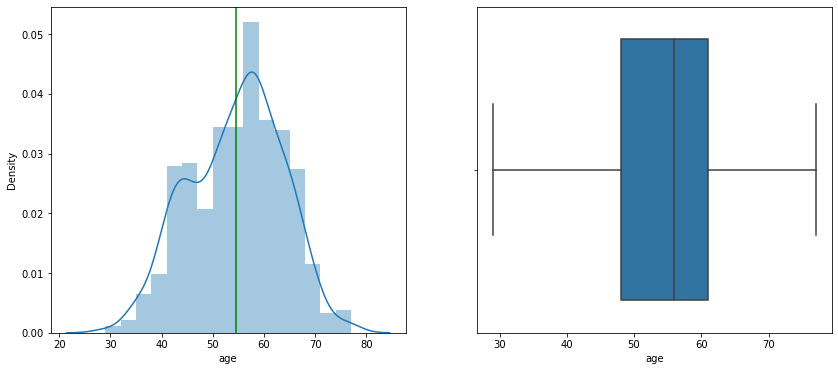

In [83]:
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
ax=sns.distplot(data['age'])
ax.axvline(data['age'].mean(),color='green')
plt.subplot(1,2,2)
sns.boxplot(x = 'age',data=data)
plt.show()

Matrice de correlation

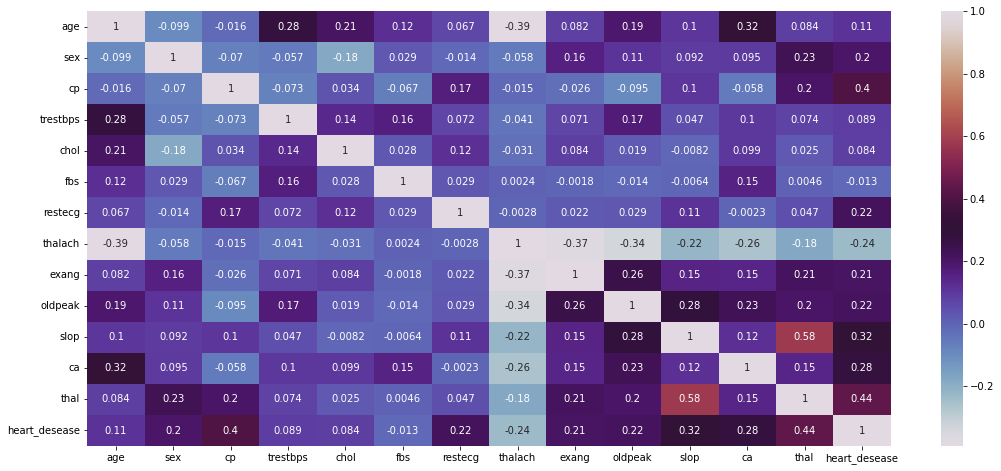

In [86]:
plt.figure(figsize = (18,8))
sns.heatmap(data.corr(), cmap = 'twilight', annot = True)
plt.show()

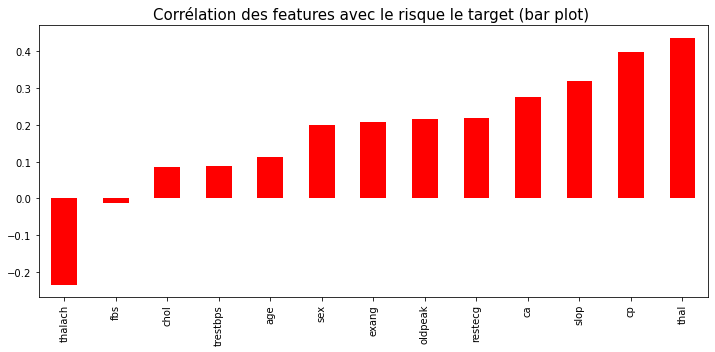

In [87]:
#Ce graphique en barres représente la corrélation entre chaque variable du jeu de données "data" et la variable "Response". La corrélation mesure la relation linéaire entre deux variables, indiquant si elles évoluent ensemble de manière similaire ou inverse.

#En observant le graphique, vous pouvez interpréter les informations suivantes :

#Les barres qui s'étendent vers le haut indiquent une corrélation positive, ce qui signifie que lorsque la valeur de la variable "Response" augmente, la valeur de la variable correspondante a tendance à augmenter également.
#Les barres qui s'étendent vers le bas indiquent une corrélation négative, ce qui signifie que lorsque la valeur de la variable "Response" augmente, la valeur de la variable correspondante a tendance à diminuer.
#Plus la barre est longue, plus la corrélation est forte. Une barre plus courte indique une corrélation plus faible.
#Les variables sans barre correspondent à une corrélation nulle ou inexistante avec la variable "Response".
#En analysant ce graphique, vous pouvez identifier les variables qui ont une corrélation significative avec la variable "Response" et ainsi comprendre quelles variables peuvent avoir une influence sur la réponse des clients.



plt.figure(figsize=(12,5))
data.corrwith(data['heart_desease']).sort_values().drop('heart_desease').plot(kind='bar', color = 'red')
plt.title('Corrélation des features avec le risque le target (bar plot) ', fontsize= 15)
plt.show()

In [92]:
data=data.drop(['age_category'], axis=1)

In [93]:
x=data.drop('heart_desease',axis=1)
y=data['heart_desease']


In [94]:
from imblearn.over_sampling import SMOTE

In [95]:
sm = SMOTE(random_state=(1000000))
x_smote,y_smote = sm.fit_resample(x,y)
print('Resample dataset shape %s' % Counter (y_smote))

Resample dataset shape Counter({1: 447, 0: 447})


In [96]:
#Reconstitution du dataset
data_stand = pd.concat([pd.DataFrame(x_smote), pd.DataFrame(y_smote, columns=['hearte_desease'])], axis=1)

In [97]:
scaler = StandardScaler()
scaler.fit(x_smote)
standardized_data=scaler.transform(x_smote)
print(standardized_data)
x_scaled=standardized_data


[[-2.05004669  0.63691473  0.17239035 ...  1.18456623  3.44420051
  -0.50164024]
 [-2.05004669  0.63691473  0.17239035 ...  1.18456623  3.44420051
  -0.50164024]
 [ 1.41246214  0.63691473 -1.68444063 ... -0.19614069  2.3743203
  -0.50164024]
 ...
 [ 0.21849358  0.63691473  1.10080583 ...  1.18456623  0.23455987
   1.21662174]
 [-1.2142687   0.63691473  1.10080583 ...  1.18456623 -0.83532035
   1.21662174]
 [-1.2142687   0.63691473  0.17239035 ... -0.19614069  0.23455987
   0.35749075]]


In [98]:
x_scaled.shape

(894, 13)

In [366]:
from sklearn.decomposition import PCA

In [367]:
#pca=PCA()
#x_pca= pca.fit_transform(x_scaled)

In [547]:
## Separation de données test et d'entrainement
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_smote,test_size=0.15, random_state=50)
print("-------------------------------------------") 
print("Le nombre de données d'entrainement est de :", len(x_train))
print("Le nombre de données test est de :", len(x_test))
print("-------------------------------------------") 

-------------------------------------------
Le nombre de données d'entrainement est de : 759
Le nombre de données test est de : 135
-------------------------------------------


In [548]:
print("nombre de données entrainement de personnes cardiaques" , len(y_train[y_train==1]))
print("nombre de données entrainement de personnes non cardiaques" , len(y_train[y_train==0]))
print("nombre de données test de personnes  cardiaques" , len(y_test[y_test==1]))
print("nombre de données test de personnes non cardiaques" , len(y_test[y_test==0]))

nombre de données entrainement de personnes cardiaques 376
nombre de données entrainement de personnes non cardiaques 383
nombre de données test de personnes  cardiaques 71
nombre de données test de personnes non cardiaques 64


In [549]:
Model_mlp = nn.MLPClassifier(hidden_layer_sizes=(100,100),activation='tanh',random_state=50,max_iter=100)

In [550]:
Model_mlp.fit(x_train,y_train)

score = Model_mlp.score(x_test,y_test)
score_train= Model_mlp.score(x_train,y_train)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [551]:
print('La precision du modèle est de ' + str(np.round(score*100,2)) + '%')


La precision du modèle est de 91.11%


In [552]:
#prediction=Model_mlp.predict(x_test)

In [553]:
#prediction_proba=Model_mlp.predict_proba(x_test)[:,1]

In [554]:
'''fpr, tpr,_= roc_curve(y_test, prediction_proba)
plt.title('lbgm Roc curve')
plt.xlabel("false positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--", color='black')
plt.show()'''

'fpr, tpr,_= roc_curve(y_test, prediction_proba)\nplt.title(\'lbgm Roc curve\')\nplt.xlabel("false positive Rate")\nplt.plot(fpr,tpr)\nplt.plot((0,1), linestyle="--", color=\'black\')\nplt.show()'

In [555]:
model_tree= DecisionTreeClassifier()
model_tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [556]:
score = model_tree.score(x_test,y_test)
print('La precision du modèle est de ' + str(np.round(score*100,2)) + '%')

La precision du modèle est de 86.67%


In [557]:
prediction=model_tree.predict(x_test)

In [558]:
matrice_conf=cm(y_test,prediction)
matrice_conf

array([[55,  9],
       [ 9, 62]], dtype=int64)

In [567]:
k=2
model_knn= KNeighborsClassifier(n_neighbors=k)
model_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [568]:
score = model_knn.score(x_test,y_test)
print('La precision du modèle est de ' + str(np.round(score*100,2)) + '%')

La precision du modèle est de 88.89%


In [569]:
predictio=model_knn.predict(x_test)

In [570]:
matrice_conf=cm(y_test,predictio)
matrice_conf

array([[59,  5],
       [10, 61]], dtype=int64)

In [571]:
model_cmb=StackingClassifier([('nn',Model_mlp),
                              ('KNN',model_knn),
                              ('Tree',model_tree)
                             ], final_estimator=MLPClassifier() )
for model in (Model_mlp,model_knn,model_tree,model_tree,model_cmb):
    model.fit(x_train,y_train)
    score= model.score(x_test, y_test)

   

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neural_network\_

In [572]:
print('La precision du modèle final sur les données test est de ' + str(np.round(score*100,2)) + '%')

La precision du modèle final sur les données test est de 92.59%


In [573]:
scores= model.score(x_train, y_train)
print('score est ' + str(np.round(scores*100,2)) + '%')

score est 99.47%


In [574]:
prediction=model.predict(x_test)
matrice_conf=cm(y_test,prediction)
matrice_conf

array([[59,  5],
       [ 5, 66]], dtype=int64)

In [477]:
from sklearn.metrics import mean_squared_error

In [478]:
print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90        64
           1       0.90      0.92      0.91        71

    accuracy                           0.90       135
   macro avg       0.90      0.90      0.90       135
weighted avg       0.90      0.90      0.90       135

